In [2]:
import os

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
# Convert flower names to numeric values

def type_to_numeric(x):
    if x == 'setosa':
        return 0
    elif x == 'versicolor':
        return 1
    else:
        return 2

In [16]:
# Read data and preprocess it

def get_data():

    iris_data = pd.read_csv("iris.csv")

    iris_data.dtypes
    iris_data.describe()
    iris_data.head()

    label_encoder = preprocessing.LabelEncoder()
    iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

    np_iris = iris_data.to_numpy()

    X = np_iris[:, 0:4]
    y = np_iris[:,4]

    scaler = StandardScaler().fit(X)

    X = scaler.transform(X)

    y = tf.keras.utils.to_categorical(y, 3)

    return X, y


In [17]:
# Create default model configurations

def base_model_config():
    model_config = {
        "HIDDEN_NODES": [32, 64],
        "HIDDEN_ACTIVATION": "relu",
        "OUTPUT_NODES": 3,
        "OUTPUT_ACTIVATION": "softmax",
        "WEIGHTS_INITIALIZER": "random_normal",
        "BIAS_INITIALIZER": "zeros",
        "NORMALIZATION": "none",
        "OPTIMIZER": "rmsprop",
        "LEARNING_RATE": 0.001,
        "REGULARIZER": None,
        "DROPOUT_RATE": 0.0,
        "EPOCHS": 10,
        "BATCH_SIZE": 16,
        "VALIDATION_SPLIT": 0.2,
        "VERBOSE": 0,
        "LOSS_FUNCTION": "categorical_crossentropy",
        "METRICS": ["accuracy"]
    }
    return model_config

In [18]:
# Optimizer function

def get_optimizer(optimizer_name, learning_rate):
    optimizer = None

    if optimizer_name == 'adagrad':
        optimizer = keras.optimizers.Adagrad(learning_rate=learning_rate)
    
    elif 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    elif 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    return optimizer

In [21]:
# Create and fit model

def create_and_run_model(model_config, X, y, model_name):

    model = tf.keras.models.Sequential(name=model_name)

    for layer in range(len(model_config['HIDDEN_NODES'])):

        if (layer == 0):
            model.add(
                keras.layers.Dense(model_config['HIDDEN_NODES'][layer],
                input_shape=(X.shape[1],),
                name = "Dense-Layer-" + str(layer),
                kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
                bias_initializer = model_config["BIAS_INITIALIZER"],
                kernel_regularizer = model_config["REGULARIZER"],
                activation = model_config["HIDDEN_ACTIVATION"])
            )
        else:

            if (model_config["NORMALIZATION"] == "batch"):
                model.add(keras.layers.BatchNormalization())

            if (model_config["DROPOUT_RATE"] > 0.0):
                model.add(keras.layers.Dropout(model_config["DROPOUT_RATE"]))

            model.add(
                keras.layers.Dense(model_config["HIDDEN_NODES"][layer],
                name="Dense-Layer-" + str(layer),
                kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
                bias_initializer = model_config["BIAS_INITIALIZER"],
                kernel_regularizer = model_config["REGULARIZER"],
                activation = model_config["HIDDEN_ACTIVATION"])
            )
    model.add(keras.layers.Dense(model_config["OUTPUT_NODES"],
        name="Output-Layer",
        activation = model_config["OUTPUT_ACTIVATION"]))

    optimizer = get_optimizer(model_config["OPTIMIZER"],
                              model_config["LEARNING_RATE"])

    model.compile(loss = model_config["LOSS_FUNCTION"],
        optimizer = optimizer,
        metrics = model_config["METRICS"])

    model.summary()

    X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, 
        test_size=model_config["VALIDATION_SPLIT"])
    
    history = model.fit(X_train,
                        y_train,
                        batch_size=model_config["BATCH_SIZE"],
                        epochs=model_config["EPOCHS"],
                        verbose=model_config["VERBOSE"],
                        validation_data=(X_val, y_val))

    return history

        

In [22]:
# Plot graph of results

def plot_graph(accuracy_measures, title):

    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 8))
    for experiment in accuracy_measures.keys():
        plt.plot(accuracy_measures[experiment],
                label=experiment,
                linewidth=3)


    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

### Layers in a Network

Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 3)    

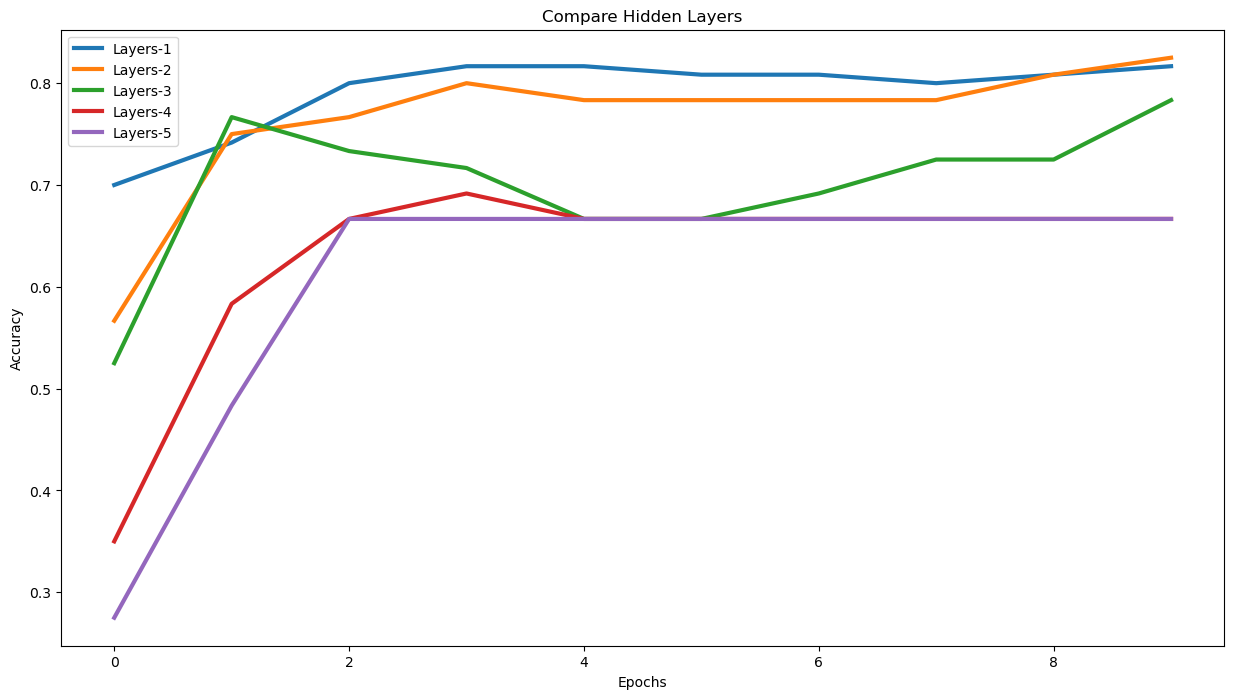